In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential


In [ ]:
img_width,img_height=224,224

model=MobileNetV2(weights='imagenet',
                include_top=False,
                input_shape=(img_height,img_width,3)
                )

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for (i,layer) in enumerate(model.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")

0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 ReLU True
4 DepthwiseConv2D True
5 BatchNormalization True
6 ReLU True
7 Conv2D True
8 BatchNormalization True
9 Conv2D True
10 BatchNormalization True
11 ReLU True
12 ZeroPadding2D True
13 DepthwiseConv2D True
14 BatchNormalization True
15 ReLU True
16 Conv2D True
17 BatchNormalization True
18 Conv2D True
19 BatchNormalization True
20 ReLU True
21 DepthwiseConv2D True
22 BatchNormalization True
23 ReLU True
24 Conv2D True
25 BatchNormalization True
26 Add True
27 Conv2D True
28 BatchNormalization True
29 ReLU True
30 ZeroPadding2D True
31 DepthwiseConv2D True
32 BatchNormalization True
33 ReLU True
34 Conv2D True
35 BatchNormalization True
36 Conv2D True
37 BatchNormalization True
38 ReLU True
39 DepthwiseConv2D True
40 BatchNormalization True
41 ReLU True
42 Conv2D True
43 BatchNormalization True
44 Add True
45 Conv2D True
46 BatchNormalization True
47 ReLU True
48 DepthwiseConv2D True
49 BatchNormalization True
50 ReLU True

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
for (i,layer) in enumerate(model.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 ReLU False
4 DepthwiseConv2D False
5 BatchNormalization False
6 ReLU False
7 Conv2D False
8 BatchNormalization False
9 Conv2D False
10 BatchNormalization False
11 ReLU False
12 ZeroPadding2D False
13 DepthwiseConv2D False
14 BatchNormalization False
15 ReLU False
16 Conv2D False
17 BatchNormalization False
18 Conv2D False
19 BatchNormalization False
20 ReLU False
21 DepthwiseConv2D False
22 BatchNormalization False
23 ReLU False
24 Conv2D False
25 BatchNormalization False
26 Add False
27 Conv2D False
28 BatchNormalization False
29 ReLU False
30 ZeroPadding2D False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 Conv2D False
37 BatchNormalization False
38 ReLU False
39 DepthwiseConv2D False
40 BatchNormalization False
41 ReLU False
42 Conv2D False
43 BatchNormalization False
44 Add False
45 Conv2D False
46 BatchNormalization False
47 ReLU False
48 DepthwiseCon

In [ ]:
def add_layer_at_bottom(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir='/content/drive/MyDrive/train_model'
val_data_dir='/content/drive/MyDrive/validation_model'

In [ ]:
pip install --upgrade tensorflow


In [ ]:
!pip install --upgrade keras tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
batch_size=32

In [ ]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

val_generator=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 757 images belonging to 4 classes.
Found 383 images belonging to 4 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_class_names = set()
num_train_samples=0
for i in train_generator.filenames:
    train_class_names.add(i.split('/')[0])
    num_train_samples+=1
print(num_train_samples)
train_class_names

757


{'cyclone', 'earthquake', 'flood', 'wildfire'}

In [ ]:
val_class_names = set()
num_val_samples=0
for i in val_generator.filenames:
    val_class_names.add(i.split('/')[0])
    num_val_samples+=1
print(num_val_samples)
val_class_names

383


{'cyclone', 'earthquake', 'flood', 'wildfire'}

In [ ]:
num_classes=len(train_generator.class_indices)
print(num_classes)
FC_head=add_layer_at_bottom(model,
                            num_classes)

main_model=Model(inputs=model.input,
                 outputs=FC_head)

main_model.summary()

4
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("Facial_recogNet.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=1,

                          restore_best_weights=True)

callbacks=[checkpoint,earlystop]

main_model.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.0015),
                   metrics=['accuracy'])

epochs=50

batch_size = 32

history = main_model.fit(train_generator,
                         steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                         callbacks=callbacks,
                         validation_data=val_generator,
                         validation_steps=num_val_samples//batch_size)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 2.8397 - accuracy: 0.5214
Epoch 1: val_loss improved from inf to 0.78520, saving model to Facial_recogNet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 277s 12s/step - loss: 2.8397 - accuracy: 0.5214 - val_loss: 0.7852 - val_accuracy: 0.6903
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 0.4916 - accuracy: 0.8193
Epoch 2: val_loss improved from 0.78520 to 0.37321, saving model to Facial_recogNet.h5
23/23 [==============================] - 75s 3s/step - loss: 0.4916 - accuracy: 0.8193 - val_loss: 0.3732 - val_accuracy: 0.8551
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 0.4231 - accuracy: 0.8690
Epoch 3: val_loss did not improve from 0.37321
23/23 [==============================] - 91s 4s/step - loss: 0.4231 - accuracy: 0.8690 - val_loss: 0.5194 - val_accuracy: 0.8125
Epoch 4/50
23/23 [==============================] - ETA: 0s - loss: 0.3160 - accuracy: 0.8967
Epoch 4: val_loss did not improve from 0.37321
Restoring model weights from the end of the best epoch: 2.
23/23 [==============================] - 93s 4s/step - loss: 0.3160 - accuracy: 0.8967 - 

1/1 [==============================] - 0s 64ms/step
wildfire


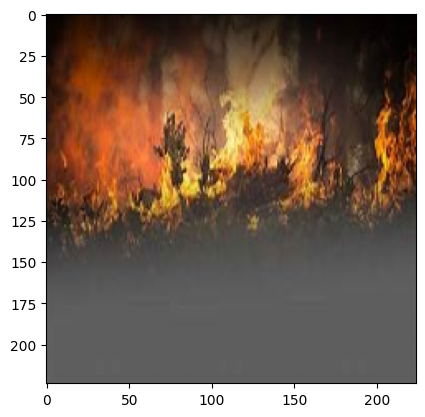

In [ ]:
import cv2
out=['cyclone', 'earthquake', 'flood', 'wildfire']
img = cv2.imread("/content/th.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img=img/255.
import matplotlib.pyplot as plt
plt.imshow(img)
img=img.reshape(1,224,224,3)
import numpy as np
res=main_model.predict(img)
print(out[np.argmax(res)])
#print(res)
if(out[np.argmax(res)]=='wildfire'):
  x="oxygen masks,water pipes,extinguishers,ladders,inflated rescue"


In [ ]:
!pip install pushbullet.py

In [ ]:
from pushbullet import Pushbullet
API_KEY= "o.MU9JrOeS85NdwmgMy9nziQZNBjfkgvz1"

In [ ]:
pb = Pushbullet(API_KEY)
push =pb.push_note('alert',x)

In [ ]:
!pip install folium


In [ ]:
import folium

# Create a map centered around coordinates (latitude, longitude)
m = folium.Map(location=[17.426699,78.381393], zoom_start=15)  # London coordinates

# Save the map to an HTML file or display it in a Jupyter notebook
m.save("map.html")


In [ ]:
!pip install kivy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 12.8 MB/s eta 0:00:00


In [ ]:
from kivy.app import App
from kivy.uix.button import Button

class DemoApp(App):
    def build(self):
        return Button(text="Hello, Kivy!")

if __name__ == '__main__':
    DemoApp().run()


[WARNING] [Config      ] Older configuration version detected (0 instead of 27)
[WARNING] [Config      ] Upgrading configuration in progress.
DEBUG:kivy:Config: Upgrading from 0 to 1
[DEBUG  ] [Config      ] Upgrading from 0 to 1
INFO:kivy:Kivy: v2.2.1
INFO:kivy:Logger: Record log in /root/.kivy/logs/kivy_23-09-26_0.txt
[INFO   ] [Logger      ] Record log in /root/.kivy/logs/kivy_23-09-26_0.txt
[INFO   ] [Kivy        ] v2.2.1
INFO:kivy:Kivy: Installed at "/usr/local/lib/python3.10/dist-packages/kivy/__init__.py"
[INFO   ] [Kivy        ] Installed at "/usr/local/lib/python3.10/dist-packages/kivy/__init__.py"
INFO:kivy:Python: v3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
[INFO   ] [Python      ] v3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
INFO:kivy:Python: Interpreter at "/usr/bin/python3"
[INFO   ] [Python      ] Interpreter at "/usr/bin/python3"
INFO:kivy:Logger: Purge log fired. Processing...
[INFO   ] [Logger      ] Purge log fired. Processing...
INFO:kivy:Logger: Purg

OSError: ignored